In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

RANDOM_SEED = 42

In [ ]:
def load_data(dir_path, img_size=(224,224)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
train_dir = '/content/drive/My Drive/Dataset_200/dataset/train/'
test_dir = '/content/drive/My Drive/Dataset_200/dataset/test/'
validation_dir = '/content/drive/My Drive/Dataset_200/dataset/validation/'

In [ ]:
IMG_SIZE = (224,224)

X_train, y_train, labels = load_data(train_dir, IMG_SIZE)
X_test, y_test, _ = load_data(test_dir, IMG_SIZE)
X_val, y_val, _ = load_data(validation_dir, IMG_SIZE)

100%|██████████| 2/2 [11:50<00:00, 355.11s/it]


1536 images loaded from /content/drive/My Drive/Dataset_200/dataset/train/ directory.


100%|██████████| 2/2 [03:40<00:00, 110.30s/it]


480 images loaded from /content/drive/My Drive/Dataset_200/dataset/test/ directory.


100%|██████████| 2/2 [02:53<00:00, 86.74s/it]

384 images loaded from /content/drive/My Drive/Dataset_200/dataset/validation/ directory.


In [ ]:
X_train.shape

(1536, 227, 227, 3)

In [ ]:
input_shape = (224,224, 3)
batch_size = 32

In [ ]:
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)

val_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 1536 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

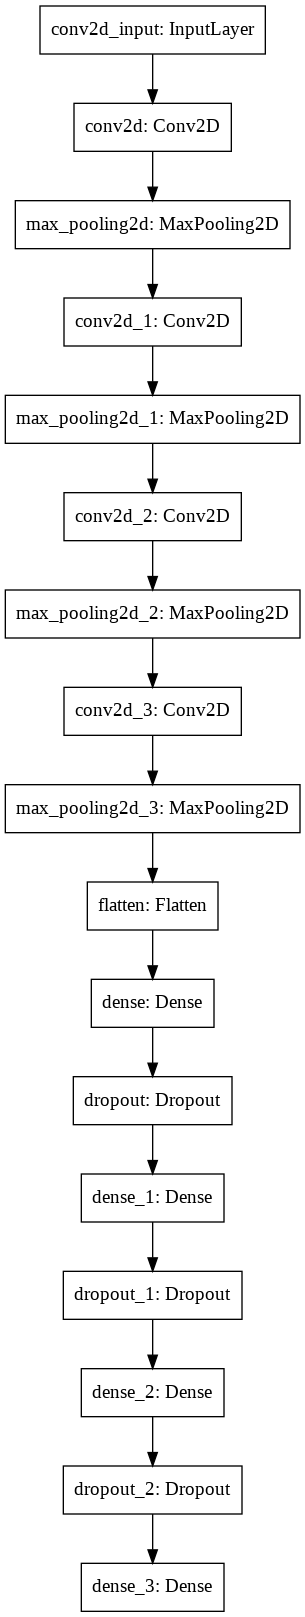

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

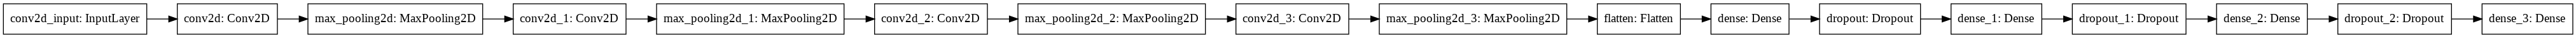

In [ ]:
plot_model(model, to_file='model.png', rankdir='LR')

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
EPOCHS = 50

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/50
48/48 [==============================] - 41s 206ms/step - loss: 0.6899 - accuracy: 0.5202 - val_loss: 0.6847 - val_accuracy: 0.5365
Epoch 2/50
48/48 [==============================] - 9s 195ms/step - loss: 0.6649 - accuracy: 0.5775 - val_loss: 0.6122 - val_accuracy: 0.6693
Epoch 3/50
48/48 [==============================] - 9s 196ms/step - loss: 0.6087 - accuracy: 0.6693 - val_loss: 0.5346 - val_accuracy: 0.7708
Epoch 4/50
48/48 [==============================] - 9s 196ms/step - loss: 0.5466 - accuracy: 0.7279 - val_loss: 0.5121 - val_accuracy: 0.7396
Epoch 5/50
48/48 [==============================] - 9s 197ms/step - loss: 0.5149 - accuracy: 0.7572 - val_loss: 0.4522 - val_accuracy: 0.8099
Epoch 6/50
48/48 [==============================] - 9s 196ms/step - loss: 0.4600 - accuracy: 0.7884 - val_loss: 0.4285 - val_accuracy: 0.8125
Epoch 7/50
48/48 [==============================] - 9s 196ms/step - loss: 0.4462 - accuracy: 0.7969 - val_loss: 0.3953 - val_accuracy: 0.8490
Epoch

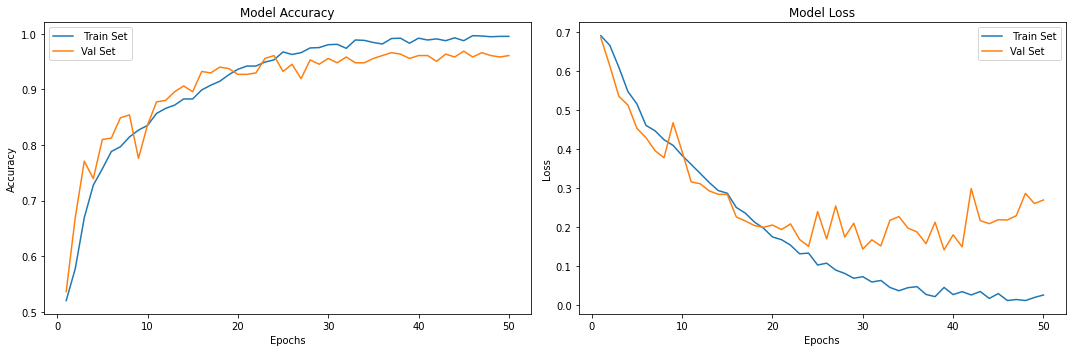

In [ ]:
epochs_range = range(1, len(history.epoch) + 1)
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history["accuracy"], label=' Train Set')
plt.plot(epochs_range, history.history["val_accuracy"], label='Val Set')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history["loss"], label=' Train Set')
plt.plot(epochs_range, history.history["val_loss"], label='Val Set')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# validate on test set
predictions = model.predict(X_val)
predictions = [1 if x>0.5 else 0 for x in predictions]

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)

print('Train: %.4f, Val: %.4f' % (train_acc, val_acc))

accuracy = accuracy_score(y_val, predictions)
print('Validation Accuracy = %.4f' % accuracy)

# precision: tp / (tp + fp)
precision = precision_score(y_val, predictions)
print('Precision: %f' % precision)

  # recall: tp / (tp + fn)
recall = recall_score(y_val, predictions)
print('Recall: %f' % recall)

  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, predictions)
print('F1 score: %f' % f1)

#KAPPA SCORE
kappa = cohen_kappa_score(y_val, predictions)
print('Cohens kappa: %f' % kappa)

  # ROC AUC
auc = roc_auc_score(y_val, predictions)
print('ROC AUC: %f' % auc)
 
# confusion matrix
matrix = confusion_matrix(y_val, predictions)
print(matrix)

tn, fp, fn, tp = matrix.ravel()
print("True positive:", tp, ", True negative:", tn,
            ", False positive:", fp, ", False negative:", fn)

Train: 0.9811, Val: 0.9271
Validation Accuracy = 0.9271
Precision: 0.922680
Recall: 0.932292
F1 score: 0.927461
Cohens kappa: 0.854167
ROC AUC: 0.927083
[[177  15]
 [ 13 179]]
True positive: 179 , True negative: 177 , False positive: 15 , False negative: 13


In [ ]:
# validate on test set
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.4f' % accuracy)

# precision: tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

  # recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

#KAPPA SCORE
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

  # ROC AUC
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)
 
# confusion matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

tn, fp, fn, tp = matrix.ravel()
print("True positive:", tp, ", True negative:", tn,
            ", False positive:", fp, ", False negative:", fn)

Train: 0.9811, Test: 0.9396
Test Accuracy = 0.9396
Precision: 0.930612
Recall: 0.950000
F1 score: 0.940206
Cohens kappa: 0.879167
ROC AUC: 0.939583
[[223  17]
 [ 12 228]]
True positive: 228 , True negative: 223 , False positive: 17 , False negative: 12


In [2]:
tp = 228
tn = 223
fp = 17
fn = 12
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

Sensitivity: 0.9500
Specificity: 0.9292
